In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Uber Request Data.csv")
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [2]:
#as can be inspected from above output the number of rows is 6745
#check for the duplicates in Request id column
print(any(df['Request id'].duplicated())) 

False


In [3]:
#Hence there are no duplicates in Request id column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [5]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [6]:
df.shape

(6745, 6)

In [7]:
# this gives the overall idea of the data presented to us
#let us find out null values in each column
#dealing with null values
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
# list the null values in percentage
#null values in percent
round(100*(df.isnull().sum()/len(df.index)), 2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

In [9]:
#As you can see more than 50% of the values  in Drop timestamp is null and almost 40% of the driver ids are  missing
#This  shows lot of trips are not completed  either  because of cancellation or non availability of cars

#For this analysis  we are interested  in demand and supply 
#So  for this out of the total variables in data  we are intersted in Request id, Pickup point, Status,Request timestamp.
#there  are no missing values in above columns.
# Hence  we can ignore the null values in Driver id and  Drop timestamp 

#from the info we can be see that Python still treats the both datetime coulmn ie Request timestamp, Drop timestamp as an object 
#we need to bring it to datetime format
#Also it can be seen that the format of the date and time in both columns are not unique

#we need to bring it in one format

df['Request timestamp']= pd.to_datetime(df['Request timestamp'], infer_datetime_format=True)
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47


In [10]:
df['Drop timestamp']= pd.to_datetime(df['Drop timestamp'], infer_datetime_format=True)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [12]:
#now we can see the both the colums have been converted in required format
# get hour from time and day from date
df['req_hr']=df['Request timestamp'].dt.hour
df['req_day']=df['Request timestamp'].dt.day
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


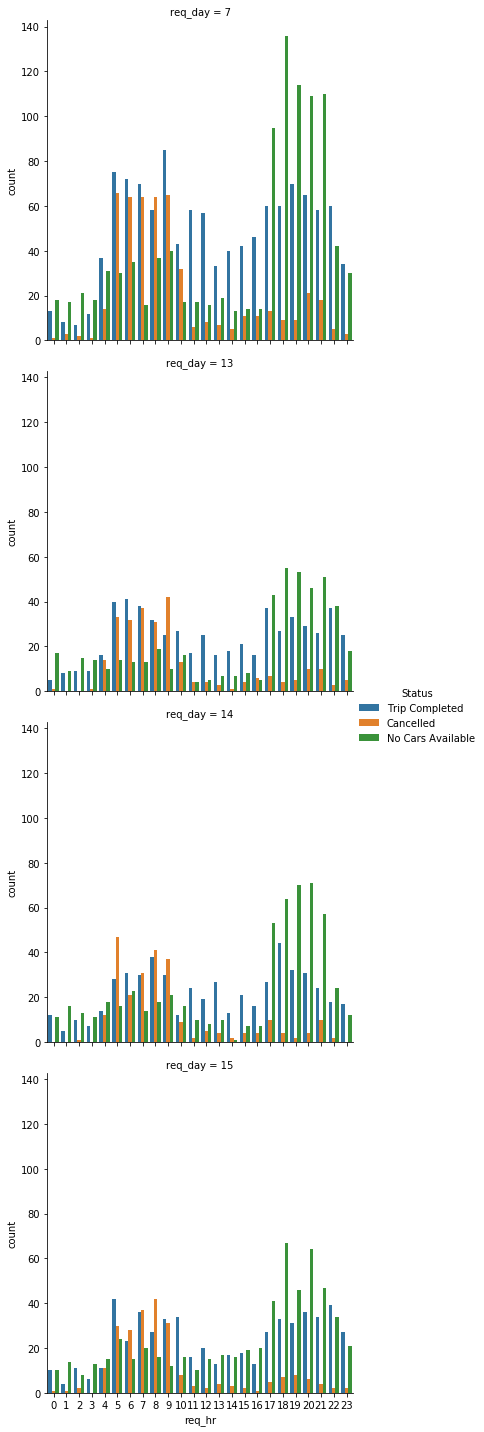

In [14]:
#cat plot of hour and day wrt to status
sns.catplot(x='req_hr', hue='Status', row='req_day', data=df, kind='count')

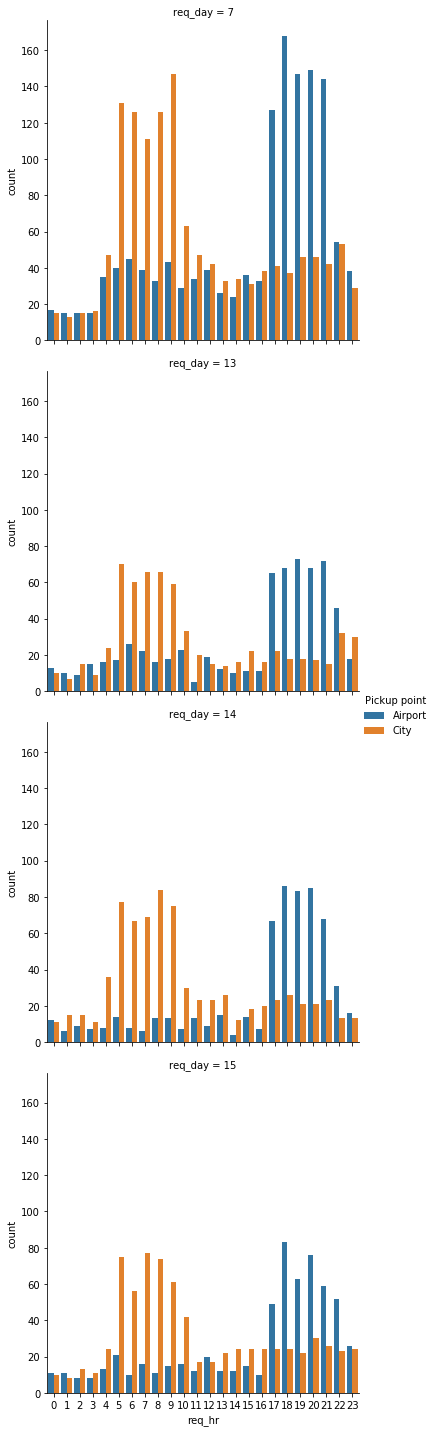

In [13]:
#cat plot of hour and day wrt to pickup points
sns.catplot(x='req_hr', hue='Pickup point', row='req_day', data=df, kind='count')

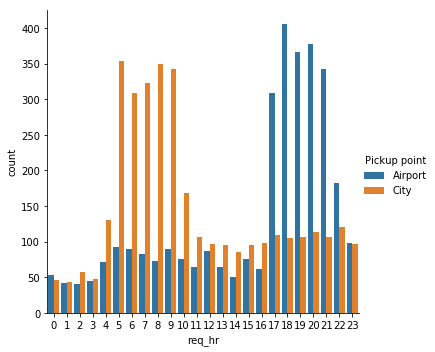

In [14]:
#as you can see the pattern for all days is almost same
#create combine plot for all days to get overall idea
sns.catplot(x='req_hr', hue='Pickup point', data=df, kind='count')

In [15]:
#create time slots to perform segmented analysis
def time_slots(x):
    if 0 <= x < 5:
        return('Early_morning')
    elif 5 <= x < 10:
        return('Active_morning')
    elif 10 <= x < 17:
        return('day_time')
    elif 17 <= x < 22:
        return('Active_evening') 
    else:
        return('Late_night')
    
df['time_slots'] = df['req_hr'].map(time_slots)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day,time_slots
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,day_time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Active_evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Active_morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Active_evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Active_morning


In [16]:
df['time_slots'].value_counts()

Active_evening    2342
Active_morning    2103
day_time          1224
Early_morning      578
Late_night         498
Name: time_slots, dtype: int64

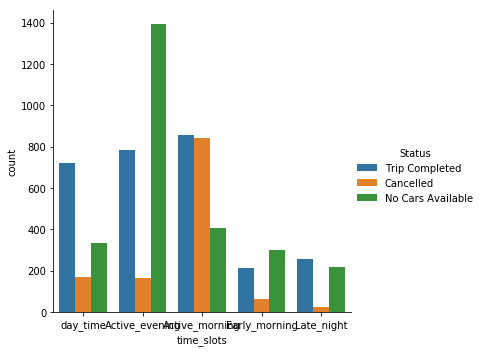

In [17]:
#we need to get  status per time slot to identify problematic time slot

sns.catplot(x='time_slots', hue='Status', data=df, kind='count')


In [18]:
#as you can see the highest number of cancellation is happening in active_morning slot

#no cars available in active_evening time slot

#we need to get into details of the problem

#we  need to get idea how many number of cancellation happen at which pck up point

# its always good to create graph with different data frame to analyse problem correctly

df_active_morning=df[df.time_slots=='Active_morning']
                  
df_active_morning.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day,time_slots
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Active_morning
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Active_morning
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Active_morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Active_morning
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,7,Active_morning


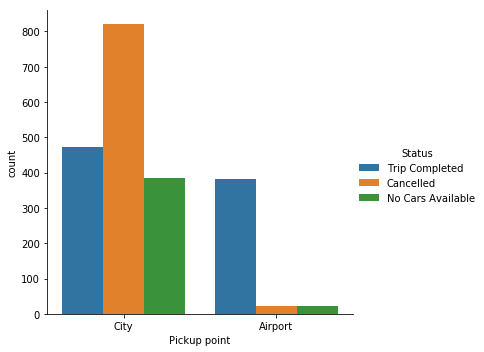

In [19]:
#get plot of pickup and status during active_morning
sns.catplot(x='Pickup point', hue='Status', data=df_active_morning, kind='count')

In [20]:
#As you can see in the active hour lot of cancellation happening from city compared to airport
#supply at city during active_morning
len(df_active_morning[(df_active_morning['Pickup point'] == 'City') & (df_active_morning['Status'] == 'Trip Completed')])


472

In [21]:
#supply at airport during active_morning
len(df_active_morning[(df_active_morning['Pickup point'] == 'Airport') & (df_active_morning['Status'] == 'Trip Completed')])

382

In [22]:
#No cars available in the city during active_morning
len(df_active_morning[(df_active_morning['Pickup point'] == 'City') & (df_active_morning['Status'] == 'No Cars Available')])

385

In [24]:
#No cars available at the  airport during active_morning
len(df_active_morning[(df_active_morning['Pickup point'] == 'Airport') & (df_active_morning['Status'] == 'No Cars Available')])

21

In [25]:
#cancelled trips at city in morning timeslot
len(df_active_morning[(df_active_morning['Pickup point'] == 'City') & (df_active_morning['Status'] == 'Cancelled')])

820

In [26]:
#cancelled trips at airport in active_morning timeslot
len(df_active_morning[(df_active_morning['Pickup point'] == 'Airport') & (df_active_morning['Status'] == 'Cancelled')])

23

In [28]:
#demand at the city
len(df_active_morning[(df_active_morning['Pickup point'] == 'City')])

1677

In [29]:
#demand at airport
len(df_active_morning[(df_active_morning['Pickup point'] == 'Airport')])

426

In [30]:
#supply  demand gap in the city during Active_morning
len(df_active_morning[(df_active_morning['Pickup point'] == 'City')])-len(df_active_morning[(df_active_morning['Pickup point'] == 'City') & (df_active_morning['Status'] == 'Trip Completed')])

1205

In [32]:
#supply  demand gap at the airport during Active_morning
len(df_active_morning[(df_active_morning['Pickup point'] == 'Airport')])-len(df_active_morning[(df_active_morning['Pickup point'] == 'Airport') & (df_active_morning['Status'] == 'Trip Completed')])

44

In [31]:
#let us consider other problematic time slot
#active_evening
#create the different data frame
df_active_evening=df[df.time_slots=='Active_evening']
                  
df_active_evening.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day,time_slots
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Active_evening
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Active_evening
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Active_evening
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Active_evening
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Active_evening


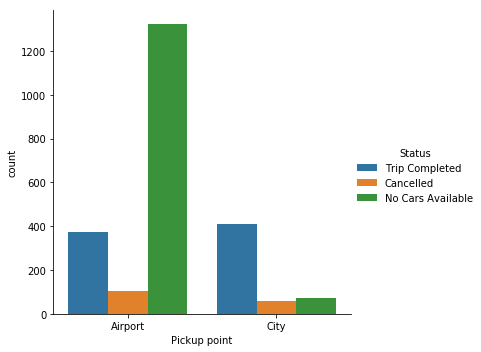

In [32]:
#get plot of pickup and status during active_morning
sns.catplot(x='Pickup point', hue='Status', data=df_active_evening, kind='count')

In [33]:
#Active evening
#As you can see in the active hour lot of cancellation happening from city compared to airport
#supply at city
len(df_active_evening[(df_active_evening['Pickup point'] == 'City') & (df_active_evening['Status'] == 'Trip Completed')])

411

In [34]:
#demand at the city
len(df_active_evening[(df_active_evening['Pickup point'] == 'City')])

542

In [35]:
#no cars available by uber in city during evening rush
len(df_active_evening[(df_active_evening['Pickup point'] == 'City') & (df_active_evening['Status'] == 'No Cars Available')])

71

In [36]:
#canellation from city
len(df_active_evening[(df_active_evening['Pickup point'] == 'City') & (df_active_evening['Status'] == 'Cancelled')])

60

In [37]:
#supply at airport
len(df_active_evening[(df_active_evening['Pickup point'] == 'Airport') & (df_active_evening['Status'] == 'Trip Completed')])

373

In [39]:
#demand at airport
len(df_active_evening[(df_active_evening['Pickup point'] == 'Airport')])

1800

In [40]:
len(df_active_evening[(df_active_evening['Pickup point'] == 'Airport') & (df_active_evening['Status'] == 'No Cars Available')])

1321

In [41]:
len(df_active_evening[(df_active_evening['Pickup point'] == 'Airport') & (df_active_evening['Status'] == 'Cancelled')])

106

In [42]:
#supply  demand gap in the city during Active_evening
len(df_active_evening[(df_active_evening['Pickup point'] == 'City')])-len(df_active_evening[(df_active_evening['Pickup point'] == 'City') & (df_active_evening['Status'] == 'Trip Completed')])

131

In [43]:
#supply  demand gap at the airport during Active_evening
len(df_active_evening[(df_active_evening['Pickup point'] == 'Airport')])-len(df_active_evening[(df_active_evening['Pickup point'] == 'Airport') & (df_active_evening['Status'] == 'Trip Completed')])

1427